## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


## Preprocessing


In [2]:
# Read Data

df = pd.read_csv('../Data/mnist.csv')

df.rename(columns={'5': 'label'}, inplace=True)

print(f'{df.head(10)}\n')
print(f'Shape: {df.shape}')

   label  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0      0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1      4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2      1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3      9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
5      1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
6      3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
7      1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
8      4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9      3  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1 

<AxesSubplot:xlabel='label', ylabel='count'>

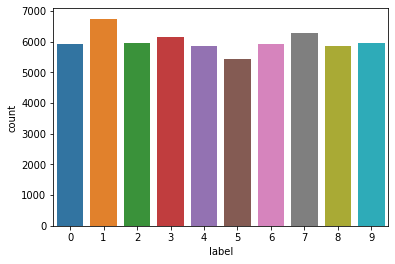

In [3]:
sns.countplot(x="label", data=df)

In [4]:
df.describe()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,4.453924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,2.889294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# Split Dataset

X = df.drop('label', axis=1).values
y = df.label.values

print(X.shape)
print(y.shape)

(59999, 784)
(59999,)


In [6]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f'Shape test set: {X_test.shape}')

Shape test set: (18000, 784)


In [7]:
# Normalising

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

print(X_test)

X_train = X_train / 255
X_test = X_test / 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Logistic Regression

In [ ]:
# Training

logreg_model = LogisticRegression(class_weight='balanced')

paramaters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': uniform(0.0001, 20)
             }

nmb_iterations = 10
max_nmb_cross_validation = 5

# Randomized search for the best parameters
for nmb_cross_validation in range(max_nmb_cross_validation):

    logreg = RandomizedSearchCV(estimator = logreg_model, 
                               param_distributions = paramaters,
                               n_iter = nmb_iterations,
                               scoring = 'accuracy',
                               cv = nmb_cross_validation + 2,
                               n_jobs = -1,
                               verbose = 1)

    logreg = logreg.fit(X_train, y_train)
    
    print(f'Best estimator: \u001b[36;1m{logreg.best_estimator_}\u001b[0m')
    print(f'Best accuracy: \u001b[32;1m{logreg.best_score_}\u001b[0m')
    

<img src="../Images/results_logreg.png">

In [ ]:
# Testing

y_pred = logreg.predict(X_test)

print(f'{classification_report(y_test, y_pred)}\n')
print(f'Accuracy: \u001b[32;1m{accuracy_score(y_test, y_pred) * 100}\u001b[0m \n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n') 

## Random Forest

In [ ]:
number_of_trees = 10000
max_number_of_features = 5

rfc = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)

print(f'{classification_report(y_test, y_pred)}\n')
print(f'Accuracy: \u001b[32;1m{accuracy_score(y_test, y_pred) * 100}\u001b[0m \n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n') 

## Ensemble methodes

In [8]:
# Adaboost

adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.9)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=150)

In [9]:
y_pred = adaboost.predict(X_test)

print(f'{classification_report(y_test, y_pred)}\n')
print(f'Accuracy: \u001b[32;1m{accuracy_score(y_test, y_pred) * 100}\u001b[0m \n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n') 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1739
           1       0.84      0.94      0.88      2000
           2       0.71      0.47      0.57      1829
           3       0.72      0.63      0.67      1850
           4       0.74      0.79      0.77      1741
           5       0.74      0.63      0.68      1642
           6       0.61      0.91      0.73      1724
           7       0.74      0.79      0.76      1909
           8       0.71      0.71      0.71      1804
           9       0.68      0.54      0.60      1762

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.72     18000
weighted avg       0.73      0.73      0.72     18000


Accuracy: 73.02777777777779 

Confusion Matrix:
[[1530    0   37    8    3   61   71    7   19    3]
 [   0 1872   24    8    3    9   16   40   27    1]
 [  62   34  862   58   20   25  593   34  129   12]
 [ 126   87   30 1174    2  157  

## Neural Network

In [10]:
# Preprocessing

y_train_hot = to_categorical(y_train)

In [12]:
# Create a neural network

unique_classes = len(df.label.unique())
input_shape = X_train.shape[1]

dropoutrate = 0.5

neural_network = Sequential([
    Input(shape=(input_shape,)), 
    Dense(750, activation='relu'),
    Dropout(dropoutrate),
    Dense(750, activation='relu'),
    Dropout(dropoutrate),
    Dense(750, activation='relu'),
    Dropout(dropoutrate),
    Dense(unique_classes, activation='sigmoid')
])

neural_network.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Training

epochs = 1000

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))

history = neural_network.fit(X_train, y_train_hot, epochs=epochs , batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping], verbose=1)

Epoch 1/1000
1050/1050 [==============================] - 16s 15ms/step - loss: 1.3131 - accuracy: 0.5605 - val_loss: 0.2683 - val_accuracy: 0.9198
Epoch 2/1000
1050/1050 [==============================] - 15s 14ms/step - loss: 0.3390 - accuracy: 0.9014 - val_loss: 0.1862 - val_accuracy: 0.9439
Epoch 3/1000
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2411 - accuracy: 0.9283 - val_loss: 0.1516 - val_accuracy: 0.9556
Epoch 4/1000
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1894 - accuracy: 0.9439 - val_loss: 0.1306 - val_accuracy: 0.9607
Epoch 5/1000
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1612 - accuracy: 0.9501 - val_loss: 0.1145 - val_accuracy: 0.9648
Epoch 6/1000
1050/1050 [==============================] - 14s 14ms/step - loss: 0.1319 - accuracy: 0.9605 - val_loss: 0.1083 - val_accuracy: 0.9685
Epoch 7/1000
1050/1050 [==============================] - 15s 14ms/step - loss: 0.1164 - accuracy: 0.9640 - val_

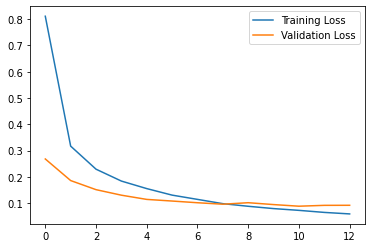

In [14]:
# Plot history

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.legend()

plt.show()

In [15]:
# Testing

y_pred = neural_network.predict_classes(X_test)

print(f'{classification_report(y_test, y_pred)}\n')
print(f'Accuracy: \u001b[32;1m{accuracy_score(y_test, y_pred) * 100}\u001b[0m \n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n') 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1739
           1       0.98      0.99      0.99      2000
           2       0.98      0.96      0.97      1829
           3       0.98      0.96      0.97      1850
           4       0.97      0.98      0.97      1741
           5       0.97      0.97      0.97      1642
           6       0.97      0.99      0.98      1724
           7       0.97      0.98      0.98      1909
           8       0.97      0.97      0.97      1804
           9       0.97      0.96      0.97      1762

    accuracy                           0.98     18000
   macro avg       0.98      0.98      0.98     18000
weighted avg       0.98      0.98      0.98     18000


Accuracy: 97.5611111111111 

Confusion Matrix:
[[1719    1    0    0    4    3    3    1    6    2]
 [   0 1976    4    3    5    2    4    2    3    1]
 [   9    6 1759   14    6    0    8   16   11    0]
 [   5    1   16 1783    2   17   